<a href="https://colab.research.google.com/github/Car-lore/DMA_LABO_Austral_2021_rosario/blob/Laboratorio-II/clasificacion_sobre_las_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import os
import sys
from google.colab import drive

import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import tensorflow.keras.layers as tfl

In [26]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [73]:
folder_path='gdrive/MyDrive/imagenesG5/'
os.listdir(folder_path)

['MLA1000', 'MLA1039', 'MLA1144', 'MLA1051', 'MLA1648']

In [76]:
img_width=128
img_height=128
images = []
labels=[]
i=0
clases=[]
for folders in os.listdir(folder_path):
    print ('Carpeta ', folders)
    try:
        for img in os.listdir('./{}/{}/'.format(folder_path,folders)):
            img = load_img('./{}/{}/{}'.format(folder_path,folders,img), target_size=(img_width, img_height))
            img = np.asarray(img)
            img = np.expand_dims(img, axis=0)
            images.append(img)
            labels.append(folders)
            i+=1
            print('\r', i, end='')
    except:
        print('Error en el archivo {}'.format(folders))
images = np.vstack(images)

Carpeta  MLA1000
 1731Carpeta  MLA1039
 3625Carpeta  MLA1144
 5037Carpeta  MLA1051
 6841Carpeta  MLA1648
 9117

In [77]:
images.shape

(9117, 128, 128, 3)

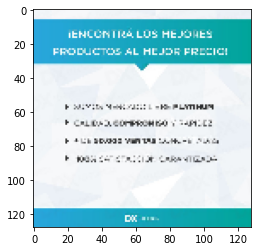

In [78]:
plt.imshow(images[2, :, :, :])

In [79]:
#Categorias
labels

['MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'ML

In [ ]:
# Esto sirve si vamos a predecir valores binarios

#encoder=OrdinalEncoder()
#encoder.fit(np.array(labels).reshape(-1,1))
#y=encoder.transform(np.array(labels).reshape(-1,1))
#X=images/255. # escalamos para que vaya de 0 a 1

In [80]:
# Si tenemos más de dos posibles valores, nos conviene esto

encoder=OneHotEncoder()
encoder.fit(np.array(labels).reshape(-1,1))
y=encoder.transform(np.array(labels).reshape(-1,1))
X=images/255.

In [4]:
y.todense()

NameError: ignored

In [37]:
# Como ya tengo mis x y mis y borro los labels e images para ahorrar memoria

del labels,images

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: ignored

In [83]:
X_train.shape

(6108, 128, 128, 3)

In [84]:
X_test.shape

(3009, 128, 128, 3)

In [85]:
y_train.shape

(6108, 5)

In [86]:
y_test.shape

(3009, 5)

In [87]:
y_test.todense()

matrix([[0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.]])

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu'))
#model.add(layers.Dense(1,activation='sigmoid'))
model.add(layers.Dense(2,activation='softmax'))

NameError: ignored

In [89]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)             

In [ ]:
# esto lo uso si tengo binary
#model.compile(optimizer='adam',
#              loss=tf.keras.losses.BinaryCrossentropy(),
#              metrics=['accuracy'])

In [90]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [91]:
y_train=y_train.todense()
y_test=y_test.todense()

In [1]:
history = model.fit(X_train, y_train, epochs=4,
                    validation_data=(X_test,y_test))

NameError: ignored

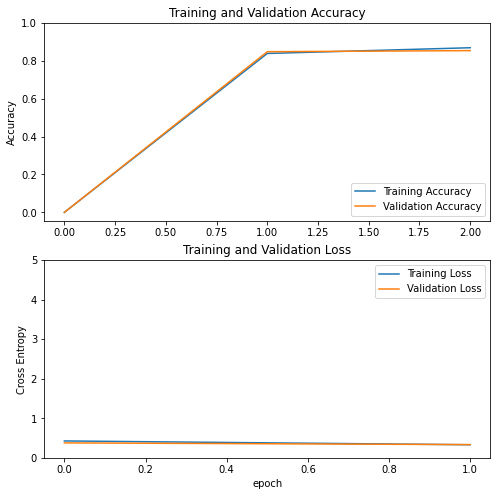

In [49]:
#Grafiquemos los resultados
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Usamos una red ya entrenada

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import EarlyStopping

new_model = Sequential()
new_model.add(ResNet50(include_top=False, weights='imagenet', pooling='avg'))
new_model.add(tfl.Dense(y_train.shape[1], activation='softmax',trainable=True))
new_model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
new_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [51]:
#Cargamos un preprocesador del modelo
preprocess_input = tf.keras.applications.resnet50.preprocess_input

In [52]:
def modelResnet(image_shape=(128,128)):
    input_shape = image_shape + (3,)
    base_model = tf.keras.applications.ResNet50(input_shape=input_shape,
                                                   include_top=False, # <== Important!!!!
                                                   weights='imagenet') # From imageNet
    
    # Freeze the base model by making it non trainable
    base_model.trainable = False 

    # create the input layer (Same as the imageNetv2 input size)
    inputs = tf.keras.Input(shape=input_shape)
    
    # data preprocessing using the same weights the model was trained on
    x = preprocess_input(inputs) 
    
    # set training to False to avoid keeping track of statistics in the batch norm layer
    x = base_model(x, training=False) 
    
    # Add the new Binary classification layers
    # use global avg pooling to summarize the info in each channel
    x = tfl.GlobalAveragePooling2D()(x) 
    #include dropout with probability of 0.2 to avoid overfitting
    x = tfl.Dropout(0.2)(x)
        
    # create a prediction layer with one neuron (as a classifier only needs one)
    prediction_layer = tfl.Dense(3,activation='softmax')
    
    outputs = prediction_layer(x) 
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [53]:
model2 = modelResnet()

In [54]:
base_learning_rate = 0.01
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [55]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 128, 128, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 128, 128, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 6147  

In [56]:
new_model.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size=20, epochs=5, verbose=1)

Epoch 1/5
161/161 [==============================] - 1008s 6s/step - loss: 0.7610 - accuracy: 0.8294 - val_loss: 16760.0410 - val_accuracy: 0.8361
Epoch 2/5
161/161 [==============================] - 947s 6s/step - loss: 0.4511 - accuracy: 0.8384 - val_loss: 0.7294 - val_accuracy: 0.8361
Epoch 3/5
161/161 [==============================] - 958s 6s/step - loss: 0.4346 - accuracy: 0.8462 - val_loss: 0.7788 - val_accuracy: 0.8361
Epoch 4/5
161/161 [==============================] - 937s 6s/step - loss: 0.3755 - accuracy: 0.8740 - val_loss: 0.4420 - val_accuracy: 0.8380
Epoch 5/5
161/161 [==============================] - 948s 6s/step - loss: 0.3192 - accuracy: 0.8936 - val_loss: 0.3334 - val_accuracy: 0.8690
